In [1]:
import numpy as np
import os 
import cv2
import matplotlib


# Canny() - argument 

- 처음부터 image / minVal / maxVal 순 
- Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients.
- 알고리즘 이해가 어렵다. 자세한 설명은 http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html#canny


In [10]:
edges = cv2.Canny(img,100,200)
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

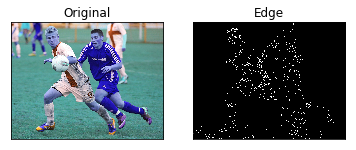

In [47]:
img = cv2.imread('hd1.jpg',1)
edges = cv2.Canny(img,100,150) #min과 max를 조정해보는데 숫자 늘리면 점이 적게 찍힘

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge'), plt.xticks([]), plt.yticks([])

plt.show()



동영상에 응용한 edge detection
---

In [6]:
import numpy as np
import cv2


def inside(r, q):
    rx, ry, rw, rh = r
    qx, qy, qw, qh = q
    return rx > qx and ry > qy and rx + rw < qx + qw and ry + rh < qy + qh


def draw_detections(img, rects, thickness = 1):
    for x, y, w, h in rects:
        # the HOG detector returns slightly larger rectangles than the real objects.
        # so we slightly shrink the rectangles to get a nicer output.
        pad_w, pad_h = int(0.15*w), int(0.05*h)
        cv2.rectangle(img, (x+pad_w, y+pad_h), (x+w-pad_w, y+h-pad_h), (0, 255, 0), thickness)


if __name__ == '__main__':

    hog = cv2.HOGDescriptor()
    cap=cv2.VideoCapture(0)
#    hog.setSVMDetector( cv2.HOGDescriptor_getDefaultPeopleDetector() ) 
#   요건 사람 탐지기라서 같이 키면 랙걸림 

    while cap.isOpened():
        _, frame = cap.read()
        found,w=hog.detectMultiScale(frame, winStride=(8,8), padding=(32,32), scale=1.05)
        draw_detections(frame,found)
        
        #### edge detection ####
        edge = cv2.Canny(frame,100,200)
        cv2.imshow('edge', edge)
        
        ch = 0xFF & cv2.waitKey(1)
        if ch == 27:
            cap.release()
            break
    cv2.destroyAllWindows()

In [8]:

cap.release()